# Import Libraries

In [182]:
pip install xgboost



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [183]:
import pickle

In [184]:
pip install streamlit



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier



# Load Dataset

In [186]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
test2=pd.read_csv('Test.csv')

In [187]:
train.head()
test2.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [188]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [189]:
#check for null values

null_counts = train.isnull().sum()
print(null_counts)


country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [190]:
#check for null values

null_counts = test.isnull().sum()
print(null_counts)


country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [191]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


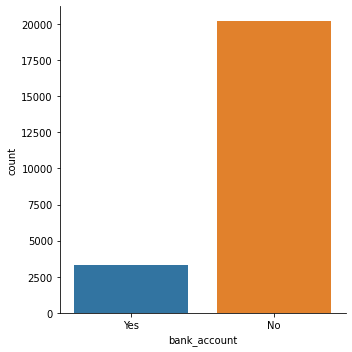

In [192]:
sns.catplot(x="bank_account", kind="count", data=train)

In [193]:
#data imbalance - how to fix it?


# Assuming X_train and y_train are the feature and target variables
# ros = RandomOverSampler(random_state=0)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# # Assuming X_train and y_train are the feature and target variables
# rus = RandomUnderSampler(random_state=0)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


In [194]:
label_encoder = LabelEncoder()

#Iterate over each column in the DataFrame and encode the values
for col in train.columns:
    train[col] = label_encoder.fit_transform(train[col])

train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,0,1,0,1,2,8,0,5,2,3,9
1,0,2,1111,0,0,0,4,54,0,1,4,0,4
2,0,2,2222,1,1,1,4,10,1,3,3,5,9
3,0,2,3333,0,0,1,4,18,0,1,2,2,3
4,0,2,4444,0,1,0,7,10,1,0,3,2,5


In [195]:
label_encoder = LabelEncoder()

#Iterate over each column in the DataFrame and encode the values
for col in test.columns:
    test[col] = label_encoder.fit_transform(test[col])

test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,3382,1,1,2,14,1,1,2,3,2
1,0,2,3383,1,1,6,35,1,1,2,5,3
2,0,2,3384,0,0,2,61,0,4,2,0,8
3,0,2,3385,0,0,5,23,0,1,2,2,8
4,0,2,3386,1,0,2,0,1,0,3,3,8


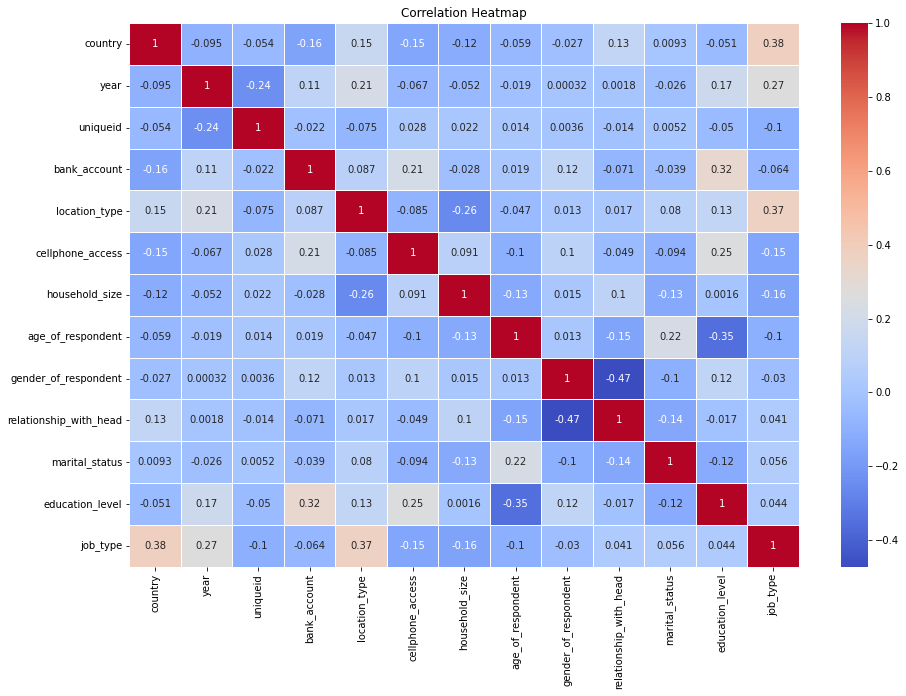

In [196]:

df = pd.DataFrame(train)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [197]:
train=train.drop(columns=['country','year','household_size','gender_of_respondent','relationship_with_head','marital_status'])
test=test.drop(columns=['country','year','household_size','gender_of_respondent','relationship_with_head','marital_status'])

In [198]:
train.head()

,uniqueid,bank_account,location_type,cellphone_access,age_of_respondent,education_level,job_type
0,0,1,0,1,8,3,9
1,1111,0,0,0,54,0,4
2,2222,1,1,1,10,5,9
3,3333,0,0,1,18,2,3
4,4444,0,1,0,10,2,5


In [199]:
#Separate training features from target
X_train = train.drop([ 'uniqueid', 'bank_account'], axis=1)
y_train = train['bank_account']
X_test=test.drop(['uniqueid'], axis=1)


In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

In [201]:
# # handling the inbalanced data

# from collections import Counter 
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()

# #fit predictor and target variable

# X_smote, y_smote = smote.fit_resample(X_train,y_train)

# print('original dataset shape', Counter(y_train))
# print('resample dataset shape', Counter(y_smote))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


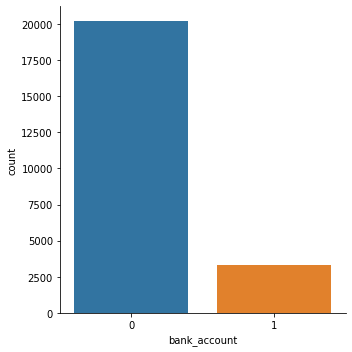

In [202]:
sns.catplot(x="bank_account", kind="count", data=train)

In [203]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [204]:
# Import the classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model 
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fitting the KNN model to the training data
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [205]:
# Importing the required module
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Fitting the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [206]:
# Importing the required module
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
dt_model = DecisionTreeClassifier()

# Fitting the model
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [207]:
# Importing the required module
from sklearn.metrics import accuracy_score

# Assuming you already have trained models xg_model and dt_model
# Make predictions on the test dataset for both models
xg_predictions = xg_model.predict(X_train_scaled)
dt_predictions = dt_model.predict(X_train_scaled)
rf_predictions = rf_model.predict(X_train_scaled)
knn_predictions=knn_model.predict(X_train_scaled)
# Calculate accuracy scores
xg_accuracy = accuracy_score(y_train, xg_predictions)
dt_accuracy = accuracy_score(y_train, dt_predictions)
rf_accuracy = accuracy_score(y_train, rf_predictions)
knn_accuracy=accuracy_score(y_train,knn_predictions)
# Print the accuracy scores
print("XGBoost Accuracy Score:", xg_accuracy)
print("Decision Tree Accuracy Score:", dt_accuracy)
print("Random Forest Accuracy Score:", rf_accuracy)
print("KNN Accuracy Score:", knn_accuracy)

XGBoost Accuracy Score: 0.894278183982316
Decision Tree Accuracy Score: 0.9078388029246727
Random Forest Accuracy Score: 0.9078388029246727
KNN Accuracy Score: 0.8824179561299099


In [208]:
from sklearn.metrics import mean_squared_error

# Assuming you already have trained models xg_model, dt_model, rf_model, and knn_model

# Make predictions on the test dataset for each model
xg_predictions = xg_model.predict(X_train_scaled)
dt_predictions = dt_model.predict(X_train_scaled)
rf_predictions = rf_model.predict(X_train_scaled)
knn_predictions = knn_model.predict(X_train_scaled)

# Calculate mean squared error for each model
xg_mse = mean_squared_error(y_train, xg_predictions)
dt_mse = mean_squared_error(y_train, dt_predictions)
rf_mse = mean_squared_error(y_train, rf_predictions)
knn_mse = mean_squared_error(y_train, knn_predictions)

# Print the mean squared error for each model
print("XGBoost Mean Squared Error (MSE):", xg_mse)
print("Decision Tree Mean Squared Error (MSE):", dt_mse)
print("Random Forest Mean Squared Error (MSE):", rf_mse)
print("KNN Mean Squared Error (MSE):", knn_mse)


XGBoost Mean Squared Error (MSE): 0.10572181601768407
Decision Tree Mean Squared Error (MSE): 0.09216119707532733
Random Forest Mean Squared Error (MSE): 0.09216119707532733
KNN Mean Squared Error (MSE): 0.11758204387009012


In [209]:
predictions_xg_model = xg_model.predict(X_test)
print(predictions_xg_model[:5])


[0 0 0 1 1]


In [210]:
predictions_dt_model = dt_model.predict(X_test)
print(predictions_dt_model[:5])

[1 1 0 1 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [211]:
predictions_rf_model = rf_model.predict(X_test)
print(predictions_rf_model[:5])

[1 1 0 1 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [212]:

predictions_knn_model = knn_model.predict(X_test)
print(predictions_knn_model[:5])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[0 0 0 0 1]


In [213]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test2["uniqueid"] + " x " + test2["country"],
                           "bank_account": predictions_rf_model})

In [214]:
# Create submission DataFrame
submission1 = pd.DataFrame({"uniqueid": test2["uniqueid"] + " x " + test2["country"],
                           "bank_account": predictions_xg_model})

In [215]:
submission.sample(5)

,uniqueid,bank_account
1253,uniqueid_7322 x Kenya,1
4270,uniqueid_10405 x Rwanda,1
1948,uniqueid_8017 x Kenya,1
1160,uniqueid_7229 x Kenya,1
8510,uniqueid_8785 x Tanzania,0


In [216]:
submission1.sample(5)

,uniqueid,bank_account
8430,uniqueid_8705 x Tanzania,0
6770,uniqueid_7045 x Tanzania,0
6967,uniqueid_7242 x Tanzania,0
1596,uniqueid_7665 x Kenya,1
283,uniqueid_6352 x Kenya,0


In [217]:
submission.to_csv('First_submission.csv', index = False)

In [218]:
#Specify the file path where you want to save each model
XGBClassifier_file = 'XGBClassifier.pkl'
RandomForest_file = 'RandomForest .pkl'
Decision_tree = 'DecisionTree.pkl'


#Save each model as a pickle file
try:
    with open(XGBClassifier_file, 'wb') as file:
        pickle.dump(xg_model, file)
    print(f"Random Forest model saved as {XGBClassifier_file} successfully.")

    with open(RandomForest_file, 'wb') as file:
        pickle.dump(rf_model, file)
    print(f"KNeighbors_Regressor model saved as {RandomForest_file} successfully.")

    with open(Decision_tree, 'wb') as file:
        pickle.dump(dt_model, file)
    print(f"Decision_tree model saved as {Decision_tree} successfully.")

except Exception as e:
    print(f"Error saving the model: {str(e)}")

Random Forest model saved as XGBClassifier.pkl successfully.
KNeighbors_Regressor model saved as RandomForest .pkl successfully.
Decision_tree model saved as DecisionTree.pkl successfully.
